Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

In [2]:
Name = "Yujing Zhang"
Collaborator = " "
Uni = "yz4471"

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** [10] Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(s) ds$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [3]:
def int_diff_error(x, f):
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    #difference
    # Use uniform discretization
    delta_x = x[1] - x[0]
    # Compute derivative
    f_prime_hat = numpy.empty(x.shape)
    f_prime_hat[1:-1] = (f(x[2:]) - f(x[:-2])) / (2. * delta_x)
    
    #integrate
    error = []
    for i in range(0, len(x)): 
        I_hat = f(x[0])
        for j in range (0, i+1):
            I_hat += f_prime_hat[j] * delta_x
        error_indi = abs(I_hat - f(x[i]))
        error.extend([error_indi])
    
    return error

In [4]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(int_diff_error(x, f)))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006306416145657301
Successful FTC evaluation.


**(b)** [10] Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(s) ds$$


In [5]:
def diff_int_error(x, f):
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # Use uniform discretization
    delta_x = x[1] - x[0]
    
    #integrate
    inte_f = []
    for i in range(0, len(x)): 
        I_hat = f(x[0])
        for j in range (0, i):
            I_hat += f(x[j]) * delta_x
        inte_f.extend([I_hat])
    
    #differentiate
    error2 = [0, ]
    for i in range(1, len(x) - 1):
        diff = (inte_f[i+1] - inte_f[i-1]) / (2 * delta_x)
        error_indi = abs(diff - f(x[i]))
        error2.extend([error_indi])
    
    #deal with the last value out of list
    #a = numpy.empty([1,1])
    #error2.append(a[0,0]) 
    
    error2.extend([abs((inte_f[-1] - inte_f[-2]) / (2 * delta_x) - f(x[-1]))])
    
    return error2

In [6]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(diff_int_error(x, f)))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006507137941250463
Successful FTC evaluation.


**(c)** [5] Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=numpy.infty` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

- As we set `ord=numpy.infty`, the error of the function is approxiamately first order convergence, and the error of first order derivatives is of second order convergence.
- As $N$ increases, the function converges to true value.

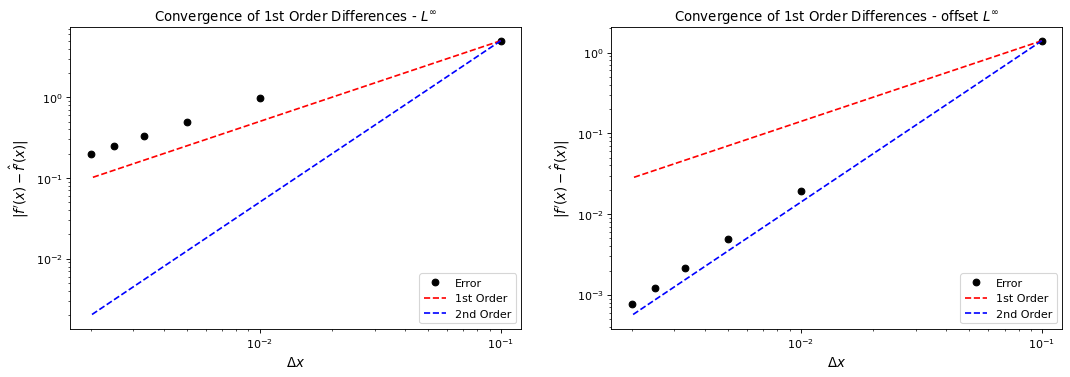

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
f_prime = lambda x: -200 * x / ((1.0 + 100.0 * x**2) ** 2)

# Compute the error as a function of delta_x
N_range = numpy.array([10,100,200,300,400,500])
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 2))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(0, 1, N+1)
    delta_x[i] = x_hat[1] - x_hat[0]

    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[i])
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[i]
    
    error[i, 0] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty)
    error[i, 1] = numpy.linalg.norm(numpy.abs(f_prime(x_hat + 0.5 * delta_x[i]) - f_prime_hat), ord=numpy.infty)
    #error[i, 2] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=1)
    #error[i, 3] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2)
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure(figsize = (16, 5), dpi = 80)

error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
for i in range(error.shape[1]):
    axes = fig.add_subplot(1, 2, i + 1)
    axes.loglog(delta_x, error[:, i], 'ko', label="Error")

    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title("Convergence of 1st Order Differences - %s" % error_type[i], fontsize = 12)
    axes.set_xlabel("$\Delta x$", fontsize = 12)
    axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$", fontsize = 12)

plt.show()

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** [2] Where do you imagine the problematic points of the integrals will be?

**Solution:**

$x = 0$ is problematic. 

When $x = 0$ and we compute the Riemann Sums $$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

$f(x_i^*) = \frac{\cos x}{\sqrt{x}} \rightarrow \infty$, causing significant error.

**(b)** [10] Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [8]:
def trap_1(N):
    # YOUR CODE HERE
    #raise NotImplementedError()

    x = numpy.linspace(0.0, 1.0, N*1 + 1)
    delta_x = x[1] - x[0]
    
    
    Ic = 0
    Is = 0
    for j in range(1, N*1): 
        Ic += (numpy.cos(x[j]) / numpy.sqrt(x[j]) + numpy.cos(x[j+1]) / numpy.sqrt(x[j+1])) * delta_x / 2
        Is += (numpy.sin(x[j]) / numpy.sqrt(x[j]) + numpy.sin(x[j+1]) / numpy.sqrt(x[j+1])) * delta_x / 2

    Ic += numpy.cos(x[1]) / numpy.sqrt(x[1]) * delta_x / 2
    Is += numpy.sin(x[1]) / numpy.sqrt(x[1]) * delta_x / 2
    
    
    return Is, Ic

In [9]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal rule only.")

Error: 7.324979502920659e-05
Computed the integrals correctly using the trapezoidal rule only.


**(c)** [10] A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function.  This can be useful in situations such as the one we have found ourselves in.  Consider the integral
$$
    \int^{x_{i+1}}_{x_i} \frac{f(x)}{\sqrt{x}} dx
$$
where here the weighting function is $x^{-1/2}$.  Say we wanted to approximate this integral by approximating $f(x)$ as a linear polynomial interpolant.  Find the resulting quadrature rule for approximating the weighted integral.

**Solutions:**

- We know that the Lagrange interpolation polynomial of order $n$ is
$$P_{n}(x)=\sum_{k=0}^{n} \ell_i(x)f\left(x_{k}\right)$$

which hopefully will be close to our function $f(x)$, so we have:
$$f(x) \sim P(x) \sum_{i=1}^{K} f\left(x_{i}\right) \ell_{i}(x)$$

where $$x_{i}=a+\frac{i-1}{K-1}(b-a)$$ and $$\ell_{i}(x)=\prod_{j \neq i} \frac{x-x_{j}}{x_{i}-x_{j}}$$.

- Substituting $P(x)$ for $f(x)$ in the integral, 
$$\int_{a}^{b} f(x) x^{-\frac{1}{2}} dx \approx \int_{a}^{b} P(x) x^{-\frac{1}{2}} d x=\sum_{i=1}^{K} w_{i} f\left(x_{i}\right)$$

with $w_i$ being
$$w_{i} = \int_{a}^{b} \ell_{i}(x) x^{-\frac{1}{2}} dx$$

**(d)** Use part (c) and evaluate only the first partition $[0, \Delta x]$ using that quadrature and use trapezoid rule for the rest of the partitions.

In [10]:
def trap_wnc(N):
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    x = numpy.linspace(0.0, 1.0, N + 1)
    delta_x = x[1] - x[0]
    
    Ici = 0
    Isi = 0
    
    # from 0 to delta_x
    #li
    points = []
    x0 = 0
    for i in range (N+1):
        x0 = 0 + i/(N+1)
        points.append(x0)
    
    Emu = 1
    for i in range (N+1):
        for j in range(N+1):
            if i != j:
                L = lambda y: (y - points[j])/(points[i] - points[j])
                Lvalue = L(x)
    Emu = Emu * Lvalue
    
    Ici += (0 + delta_x) / 2 * Emu * delta_x**(-1/2) * numpy.cos(delta_x) / 2
    Isi += (0 + delta_x) / 2 * Emu * delta_x**(-1/2) * numpy.sin(delta_x) / 2

    
    for j in range(1, N): 
        Ici += (numpy.cos(x[j]) / numpy.sqrt(x[j]) + numpy.cos(x[j+1]) / numpy.sqrt(x[j+1])) * delta_x /2
        Isi += (numpy.sin(x[j]) / numpy.sqrt(x[j]) + numpy.sin(x[j+1]) / numpy.sqrt(x[j+1])) * delta_x /2
    
    Is = max(Isi)
    Ic = max(Ici)
    
    return Is, Ic

In [11]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 7.324979502931761e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** [5] Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [12]:
def trap_transformed(N):
    # YOUR CODE HERE1
    #raise NotImplementedError()
    
    x = numpy.linspace(0.0, 1.0, N + 1)
    delta_x = x[1] - x[0]
    
    Ic = 0
    Is = 0
    for j in range(1, N): 
        Ic += (numpy.cos(x[j]**2) / x[j] * 2 * x[j] + numpy.cos(x[j+1]**2) / x[j+1] * 2 * x[j+1]) * delta_x /2
        Is += (numpy.sin(x[j]**2) / x[j] * 2 * x[j] + numpy.sin(x[j+1]**2) / x[j+1] * 2 * x[j+1]) * delta_x /2

    #Ic += numpy.cos(1) * 2 * delta_x /2
    #Is += numpy.sin(1) * 2 * delta_x /2
    #Ic += (numpy.cos(x[1]**2) / x[1] * 2 * x[1] + numpy.cos(x[-1]**2) / x[-1] * 2 * x[-1]) * delta_x /2
    #Is += (numpy.sin(x[1]**2) / x[1] * 2 * x[1] + numpy.sin(x[-1]**2) / x[-1] * 2 * x[-1]) * delta_x /2
    
    return Is, Ic

In [13]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print("Computed the integrals correctly using the trapezoidal rule.")

Error: 4.377544250533383e-06
Computed the integrals correctly using the trapezoidal rule.


**(f)** [5] Do the same as in part (e) again using the transformation $x=t^2$ but use 3-point Gauss-Legendre quadrature for the approximation to the integral.

In [14]:
def gauss_legendre_3(N):
    f = lambda x: 2*numpy.sin(x**2)
    g = lambda x: 2*numpy.cos(x**2)

    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x = x_hat[1] - x_hat[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = 0
    xi_1 =  numpy.sqrt(3.0 / 5.0)
    xi_2 =  -numpy.sqrt(3.0 / 5.0)
    
    I_hat_s = (8*f(xi_map(x_hat[0], x_hat[1], xi_0))/9 + 5*f(xi_map(x_hat[0], x_hat[1], xi_1))/9 + 5*f(xi_map(x_hat[0], x_hat[1], xi_2))/9) * delta_x / 2.0
    I_hat_c = (8*g(xi_map(x_hat[0], x_hat[1], xi_0))/9 + 5*g(xi_map(x_hat[0], x_hat[1], xi_1))/9 + 5*g(xi_map(x_hat[0], x_hat[1], xi_2))/9) * delta_x / 2.0
    for i in range(1, N):
        I_hat_c += (8*g(xi_map(x_hat[i], x_hat[i+1], xi_0))/9 + 5*g(xi_map(x_hat[i], x_hat[i+1], xi_1))/9 + 5*g(xi_map(x_hat[i], x_hat[i+1], xi_2))/9) * delta_x / 2.0
        I_hat_s += (8*f(xi_map(x_hat[i], x_hat[i+1], xi_0))/9 + 5*f(xi_map(x_hat[i], x_hat[i+1], xi_1))/9 + 5*f(xi_map(x_hat[i], x_hat[i+1], xi_2))/9) * delta_x / 2.0
            
    Is = I_hat_s
    Ic = I_hat_c
    
    return Is, Ic

In [15]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 8.570633092119806e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(g)** [5] Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

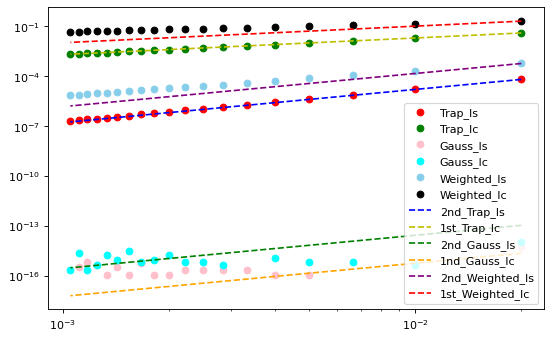

In [16]:
# YOUR CODE HERE
#raise NotImplementedError()
num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_trans_s = numpy.empty(len(num_partitions))
error_gauss_s = numpy.empty(len(num_partitions))
error_trans_c = numpy.empty(len(num_partitions))
error_gauss_c = numpy.empty(len(num_partitions))
error_weighted_s = numpy.empty(len(num_partitions))
error_weighted_c = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
    Is *= numpy.sqrt(2.0 * numpy.pi)
    Ic *= numpy.sqrt(2.0 * numpy.pi)
    Is_hat_trans, Ic_hat_trans = trap_transformed(N)
    Is_hat_gauss, Ic_hat_gauss = gauss_legendre_3(N)
    Is_hat_weighted, Ic_hat_weighted = trap_wnc(N)

    # Compute transformed method
    error_trans_s[j] = numpy.abs(Is_hat_trans - Is)
    error_trans_c[j] = numpy.abs(Ic_hat_trans - Ic)
    
    # Compute gauss method
    error_gauss_s[j] = numpy.abs(Is_hat_gauss - Is)
    error_gauss_c[j] = numpy.abs(Ic_hat_gauss - Ic)
    
    # Compute weighted method
    error_weighted_s[j] = numpy.abs(Is_hat_weighted - Is)
    error_weighted_c[j] = numpy.abs(Ic_hat_weighted - Ic)

fig = plt.figure(figsize = (8, 5), dpi = 80)
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error + 1e-13) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_trans_s, 'ro', label="Trap_Is")
axes.loglog(delta_x, error_trans_c, 'o',color = "green", label="Trap_Ic")
axes.loglog(delta_x, error_gauss_s, 'o', color = "pink" ,label="Gauss_Is")
axes.loglog(delta_x, error_gauss_c, 'o',color = "cyan", label="Gauss_Ic")
axes.loglog(delta_x, error_weighted_s, 'o',color = "skyblue", label="Weighted_Is")
axes.loglog(delta_x, error_weighted_c, 'ko', label="Weighted_Ic")


axes.loglog(delta_x, order_C(delta_x[0], error_trans_s[0], 2.0) * delta_x**2.0, 'b--', label="2nd_Trap_Is")
axes.loglog(delta_x, order_C(delta_x[0], error_trans_c[0], 1.0) * delta_x**1.0, 'y--', label="1st_Trap_Ic")
axes.loglog(delta_x, order_C(delta_x[0], error_gauss_s[0], 2.0) * delta_x**2.0, 'g--', label="2nd_Gauss_Is")
axes.loglog(delta_x, order_C(delta_x[0], error_gauss_c[0], 1.0) * delta_x**2.0, '--', color = "orange", label="1nd_Gauss_Ic")
axes.loglog(delta_x, order_C(delta_x[0], error_weighted_s[0], 2.0) * delta_x**2.0, '--', color = "purple", label="2nd_Weighted_Is")
axes.loglog(delta_x, order_C(delta_x[0], error_weighted_c[0], 1.0) * delta_x**1.0, 'r--', label="1st_Weighted_Ic")

axes.legend(loc=4, fontsize = 10)

plt.show()

**(h)** [3] Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

- For Trap Method and Weighted Method, $Is$ is of second order convergence and $Ic$ is of first order convergence.
- For Gauss Method, it's not first or second order convergence. And $Is$ and $Ic$ are between the first and second order convergence.

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following assume that the data considered are equi-spaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.

**(a)** [10] Derive the forward and backward second order finite difference approximations to the second derivative using the method of your choice.

**Solutions:**

Aim: given 3 equispaced points $x_{2}, x_{1}, x_0$ to calculate the consistent 2nd order, 1st derivative operator evaluated at each point. Similarly, we use 4 points $x_3, x_{2}, x_{1}, x_0$ to calculate 2nd order, 2nd derivative. Remark: We can also use $x_{n+2}, x_{n+1}, x_n$, but here, let's simplify the notation.

Method: Using Taylor series to derive.


- Forward:

$$f(x_1) = f(x_0) + f'(x_0)\Delta x + \frac{f''(x_0)}{2!}\Delta x^2 + \frac{f'''(R_1)}{3!} \Delta x^3$$
$$f(x_2) = f(x_0) + f'(x_0)2\Delta x + \frac{f''(x_0)}{2!}(2\Delta x)^2 + \frac{f'''(R_1)}{3!} (2\Delta x)^3$$

Shift derivative to left hand side and simplify, we get
$$ f'(x_0) = \frac{-3f(x_0) + 4f(x_1) - f(x_2)}{2 \Delta x}$$

$$ f''(x_0) = \frac{2f(x_0) - 5f(x_1) + 4f(x_2) - f(x_3)}{\Delta x^3}$$

- Backward:

$$f(x_0) = f(x_1) - f'(x_1)\Delta x + \frac{f''(x_1)}{2!}\Delta x^2 - \frac{f'''(R_1)}{3!} \Delta x^3$$
$$f(x_0) = f(x_2) - f'(x_2)2\Delta x + \frac{f''(x_2)}{2!}(2\Delta x)^2 - \frac{f'''(R_1)}{3!} (2\Delta x)^3$$

Shift derivative to left hand side and simplify, we get
$$ f'(x_2) = \frac{3f(x_2) - 4f(x_1) + f(x_0)}{2 \Delta x}$$

$$ f''(x_3) = \frac{2f(x_3) - 5f(x_2) + 4f(x_1) - f(x_0)}{\Delta x^3}$$

**(b)** [10] Using a second order centered finite difference approximation to the second derivative and the appropriate second order forward and backward difference schemes at the edges of the domain find the matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative for the given data.  In other words for $y_i = f(x_i)$
$$
    f''(x) \approx D y.
$$

**Solutions:**

- Step 1: Derive Centered Case

Using the similar method, we can the centered second order finite difference approximations to the second derivative:

$$f''(x_1) = \frac{f(x_2) - 2f(x_1) + f(x_0)}{\Delta x^2}$$

$$f''(x_2) = \frac{f(x_3) - 2f(x_2) + f(x_1)}{\Delta x^2}$$

- Step 2: Derive the matrix

According to question (a) and (b), we have:
$$
\frac{1}{\Delta x^2}
\cdot
\begin{bmatrix}
    \frac{2}{\Delta x} & \frac{-5}{\Delta x} & \frac{4}{\Delta x} & \frac{-1}{\Delta x} & \cdots & 0 & 0\\
    1 & -2 & 1 & 0 & \cdots & 0  & 0\\
    0 & 1 & -2 & 1 & \cdots & 0  & 0\\
    \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
    0 & 0 & \cdots & 0 & 1 & -2 & 1\\
    0 & 0& \cdots& \frac{-1}{\Delta x} & \frac{4}{\Delta x} & \frac{-5}{\Delta x} & \frac{2}{\Delta x}
\end{bmatrix} 
\cdot
\begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    \vdots \\
    \vdots \\
    \vdots \\
    f(x_n) 
\end{bmatrix} 
=\begin{bmatrix}
    f''(x_0) \\
    f''(x_1) \\
    \vdots \\
    \vdots \\
    \vdots \\
    f''(x_n) 
\end{bmatrix} 
$$



**(c)** [10] Write a function that takes in the number of data points $N$ and returns the matrix $D$.  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.  *Hint:* The command `numpy.diag` may be extremely helpful.

In [17]:
def diff_matrix(N):
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    D = numpy.zeros((N, N))
    row, col = numpy.diag_indices_from(D)
    D[row, col] = -2
    
    D_plus = D[0:N - 1, 1:N]
    row, col = numpy.diag_indices_from(D_plus)
    D_plus[row, col] = 1
    D[0:N-1, 1:N] = D_plus
    
    D_minors = D[1:N, 0:N - 1]
    row2, col2 = numpy.diag_indices_from(D_minors)
    D_minors[row2, col2] = 1
    D[1:N, 0:N - 1] = D_minors
    
    delta_x = 2 / (N - 1)
    
    D[0, 0] = 2
    D[0, 1] = -5
    D[0, 2] = 4
    D[0, 3] = -1
    
    D[N-1, N-4] = -1
    D[N-1, N-3] = 4
    D[N-1, N-2] = -5
    D[N-1, N-1] = 2
    
    D = D / delta_x**2
    
    return D

In [18]:
N = 200
x = numpy.linspace(-1, 1, N)
y = numpy.sin(x) * numpy.cos(x)
numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), -4.0 * numpy.sin(x) * numpy.cos(x), rtol=1e-2)
print("Success!")

Success!


**(c)** [5] Suppose instead that we did not know the vector $f(x_i) = y_i$ but instead knew the value of second derivative at these points.  If we wanted to find the vector $y$ what kind of problem would we have to solve?  What is the continuous analog of this problem and what additional information would we need?

**Solution:**
1. We should solve the linear algebra problem:
$$f(x) = D^{-1} f''(x)$$
for $y \approx f(x)$.

2. Additional information:
We need maxtrix $D$ is invertible, which highly depends on the number of points and the approximation method (centered, forward, backward) you choose.